
# Using 4 layered radial fiber to model polymer loss

Layers: air, glass, (lossy) polymer, air.  Goal is to see if this is why we don't experimentally see the level of variation (grassy field) that we might predict from our outer air model.  Guess is that lossy polymer coating attenuates the fields enough to modify and smooth the grass.  Maybe then the results look more like experiment (which have a good amount of variation, but not grass level variation).

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# First polymer without extinction coefficient

In [89]:
n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5

In [90]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [.1, .02, .012, .1]

In [91]:
A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=3.6e-6)

In [5]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [92]:
k_low = A.ks[0] * A.scale
k_high = A.ks[1] * A.scale
k_low, k_high

(26.18719507354657, 37.668127278737614)

In [93]:
outer = 'h2'
nu = 1

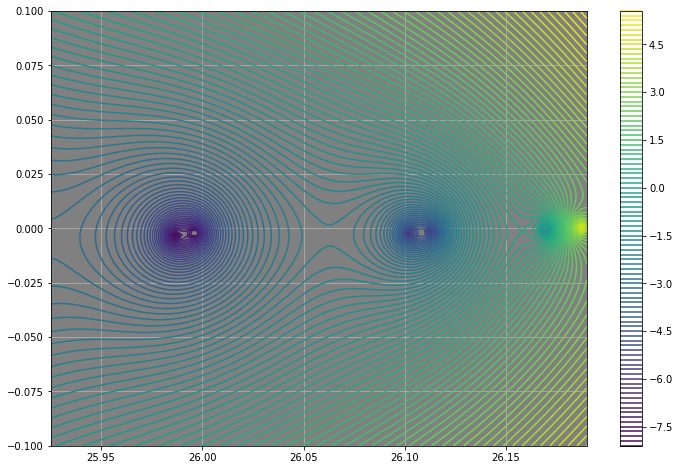

In [94]:
plotlogf(A.determinant, .99*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [95]:
guess = np.array(.9993*k_low)

beta = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta, ". Residual of determinant: ", abs(A.determinant(beta, nu, outer)))


Scaled beta:  (26.169898422986968-0.0006239636259401427j) . Residual of determinant:  1.3344936174665898e-13


In [96]:
Fs = A.all_fields(beta, nu, outer)

In [97]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Now polymer with a non-zero extinction coefficient

In [99]:
n_air = 1.00027717
n_glass = 1.4388164768221814
n_poly = 1.5-.01j

In [100]:
ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 15*2.7183333333333333e-6, 15*2e-6]
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_poly, lambda x:n_air]
mats = ['air','glass', 'polymer','air']
maxhs = [.1, .02, .012, .1]

In [101]:
A = BraggExact(ts=ts, ns=ns , mats=mats,maxhs=maxhs, wl=2*3.1e-6)

In [102]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [103]:
k_low = A.ks[0].real * A.scale
k_high = A.ks[1].real * A.scale
k_low, k_high

(15.205468107220588, 21.871815839267004)

In [104]:
outer = 'h2'
nu = 1

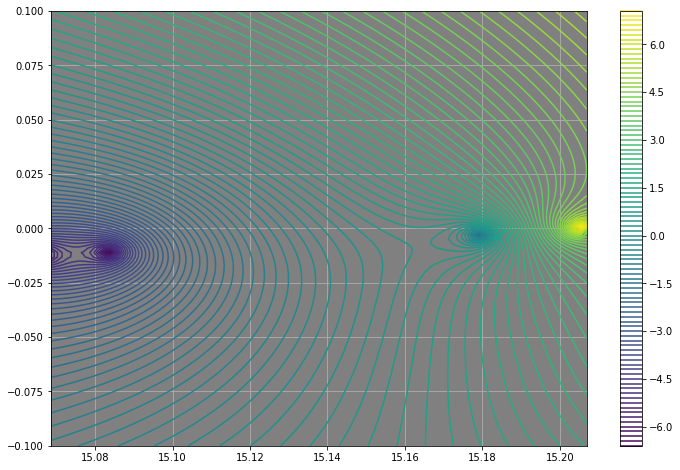

In [105]:
plotlogf(A.determinant, .991*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

In [106]:
guess = np.array(.9999*k_low)

beta = newton(A.determinant, guess, args=(nu, outer), tol = 1e-12)

print("Scaled beta: ", beta, ". Residual of determinant: ", abs(A.determinant(beta, nu, outer)))


Scaled beta:  (15.179297672345365-0.0032000283657534455j) . Residual of determinant:  6.798317589233422e-13


In [107]:
Fs = A.all_fields(beta, nu, outer)

In [108]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene